## Preliminary Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
from IPython.display import display

# for parsing the data from yfinance using the native support with dataReader
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
yf.pdr_override()

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day) # take one year's worth of data

# Choose the tickers here
tickerList = ["MSFT", "MU", "NVDA"]

#combine the data into one dataframe for easy filtering and wrangling
allData = pd.DataFrame()
for ticker in tickerList:
    data = yf.download(ticker, start, end)
    data['company_name'] = ticker
    allData = pd.concat([allData,data], axis=0)
    


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Before starting the analysis, it would be prudent to first get a sense of what exactly are the data we are looking at, including the data types and posible ways the data can be analyzed.

Therefore, a summary is presented here for viewing, for the chosen tickers

In [2]:
#display 1 year worth of data from the tickers chosen for viewing
for ticker in pd.unique(allData["company_name"]):
    display(allData.loc[allData['company_name']==ticker])

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-01,306.970001,308.600006,305.149994,305.559998,303.072601,21294100,MSFT
2023-05-02,307.760010,309.179993,303.910004,305.410004,302.923798,26404400,MSFT
2023-05-03,306.619995,308.609985,304.089996,304.399994,301.922058,22360800,MSFT
2023-05-04,306.239990,307.760010,303.399994,305.410004,302.923798,22519900,MSFT
2023-05-05,305.720001,311.970001,304.269989,310.649994,308.121185,28181200,MSFT
...,...,...,...,...,...,...,...
2024-04-24,409.559998,412.470001,406.779999,409.059998,409.059998,15065300,MSFT
2024-04-25,394.029999,399.890015,388.029999,399.040009,399.040009,40586500,MSFT
2024-04-26,412.170013,413.000000,405.760010,406.320007,406.320007,29553600,MSFT


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-01,63.889999,64.099998,62.310001,62.349998,61.986336,12823400,MU
2023-05-02,62.230000,62.580002,61.250000,61.900002,61.538963,12237600,MU
2023-05-03,61.490002,62.180000,60.820000,60.910000,60.554733,10818100,MU
2023-05-04,60.549999,60.959999,59.900002,60.509998,60.157066,13357900,MU
2023-05-05,60.610001,61.740002,60.110001,61.230000,60.872868,12305900,MU
...,...,...,...,...,...,...,...
2024-04-24,112.720001,113.949997,109.230003,111.779999,111.779999,20505900,MU
2024-04-25,109.370003,113.059998,108.070000,111.580002,111.580002,18342800,MU
2024-04-26,112.000000,115.059998,111.599998,114.839996,114.839996,19876200,MU


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-01,278.399994,290.579987,277.799988,289.100006,289.007324,57032900,NVDA
2023-05-02,286.799988,288.359985,280.829987,282.100006,282.009552,40273000,NVDA
2023-05-03,278.399994,283.670013,274.720001,278.019989,277.930878,38338700,NVDA
2023-05-04,276.510010,278.589996,272.399994,275.619995,275.531616,32185000,NVDA
2023-05-05,278.260010,287.549988,277.309998,286.799988,286.708038,36101400,NVDA
...,...,...,...,...,...,...,...
2024-04-24,839.500000,840.820007,791.830017,796.770020,796.770020,51220800,NVDA
2024-04-25,788.679993,833.229980,782.229980,826.320007,826.320007,42464100,NVDA
2024-04-26,838.179993,883.309998,833.869995,877.349976,877.349976,54667300,NVDA


where "Close" would eb the cost of the shares at the end of the day, and "Adj Close" are with the stock splits and dividends, and all sorts of corporate actions incorporated into the price.

## General Ticker Summary

In [27]:
#general descriptive statistics
print("MSFT Recent 5 days Data:")
MSFT = yf.Ticker("MSFT")
display(MSFT.history(period='5d'))
print("="*30, "\n")

print("MU Recent 5 days Data:")
MU = yf.Ticker("MU")
display(MU.history(period='5d'))
print("="*30, "\n")

print("NVDA Recent 5 days Data:")
NVDA = yf.Ticker("NVDA")
display(NVDA.history(period='5d'))
print("="*30, "\n")

MSFT Recent 5 days Data:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-24 00:00:00-04:00,409.559998,412.470001,406.779999,409.059998,15065300,0.0,0.0
2024-04-25 00:00:00-04:00,394.029999,399.890015,388.029999,399.040009,40586500,0.0,0.0
2024-04-26 00:00:00-04:00,412.170013,413.000000,405.760010,406.320007,29553600,0.0,0.0
2024-04-29 00:00:00-04:00,405.250000,406.320007,399.190002,402.250000,19582100,0.0,0.0
2024-04-30 00:00:00-04:00,401.489990,402.160004,389.170013,389.329987,28719700,0.0,0.0



MU Recent 5 days Data:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-24 00:00:00-04:00,112.720001,113.949997,109.230003,111.779999,20505900,0.0,0.0
2024-04-25 00:00:00-04:00,109.370003,113.059998,108.070000,111.580002,18342800,0.0,0.0
2024-04-26 00:00:00-04:00,112.000000,115.059998,111.599998,114.839996,19876200,0.0,0.0
2024-04-29 00:00:00-04:00,113.809998,114.750000,112.110001,114.360001,14419100,0.0,0.0
2024-04-30 00:00:00-04:00,114.180000,116.279999,112.930000,112.959999,14815700,0.0,0.0



NVDA Recent 5 days Data:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-24 00:00:00-04:00,839.500000,840.820007,791.830017,796.770020,51220800,0.0,0.0
2024-04-25 00:00:00-04:00,788.679993,833.229980,782.229980,826.320007,42464100,0.0,0.0
2024-04-26 00:00:00-04:00,838.179993,883.309998,833.869995,877.349976,54667300,0.0,0.0
2024-04-29 00:00:00-04:00,875.950012,879.919983,852.659973,877.570007,38897100,0.0,0.0
2024-04-30 00:00:00-04:00,872.400024,888.190002,863.000000,864.020020,36055200,0.0,0.0


## Viewing Stock Attributes

The data comes with several properties that we can visualize individually. Some may be intertwined, and some are not. To understand these properties before going deeper, we visualize them below first.

Doing this would also show us some irregularities. for example, a recent sharp drop in stock prices can be seen, which we can then analyze further to get the reasoning behind it.

Why is this useful? In a lot of cases, it might not be, but if it turns out that a sharp drop is for example because of a shift in company focus, then the drop signals the general public's distrust in such shifts, meaning it might not be the best time to invest in the company yet.

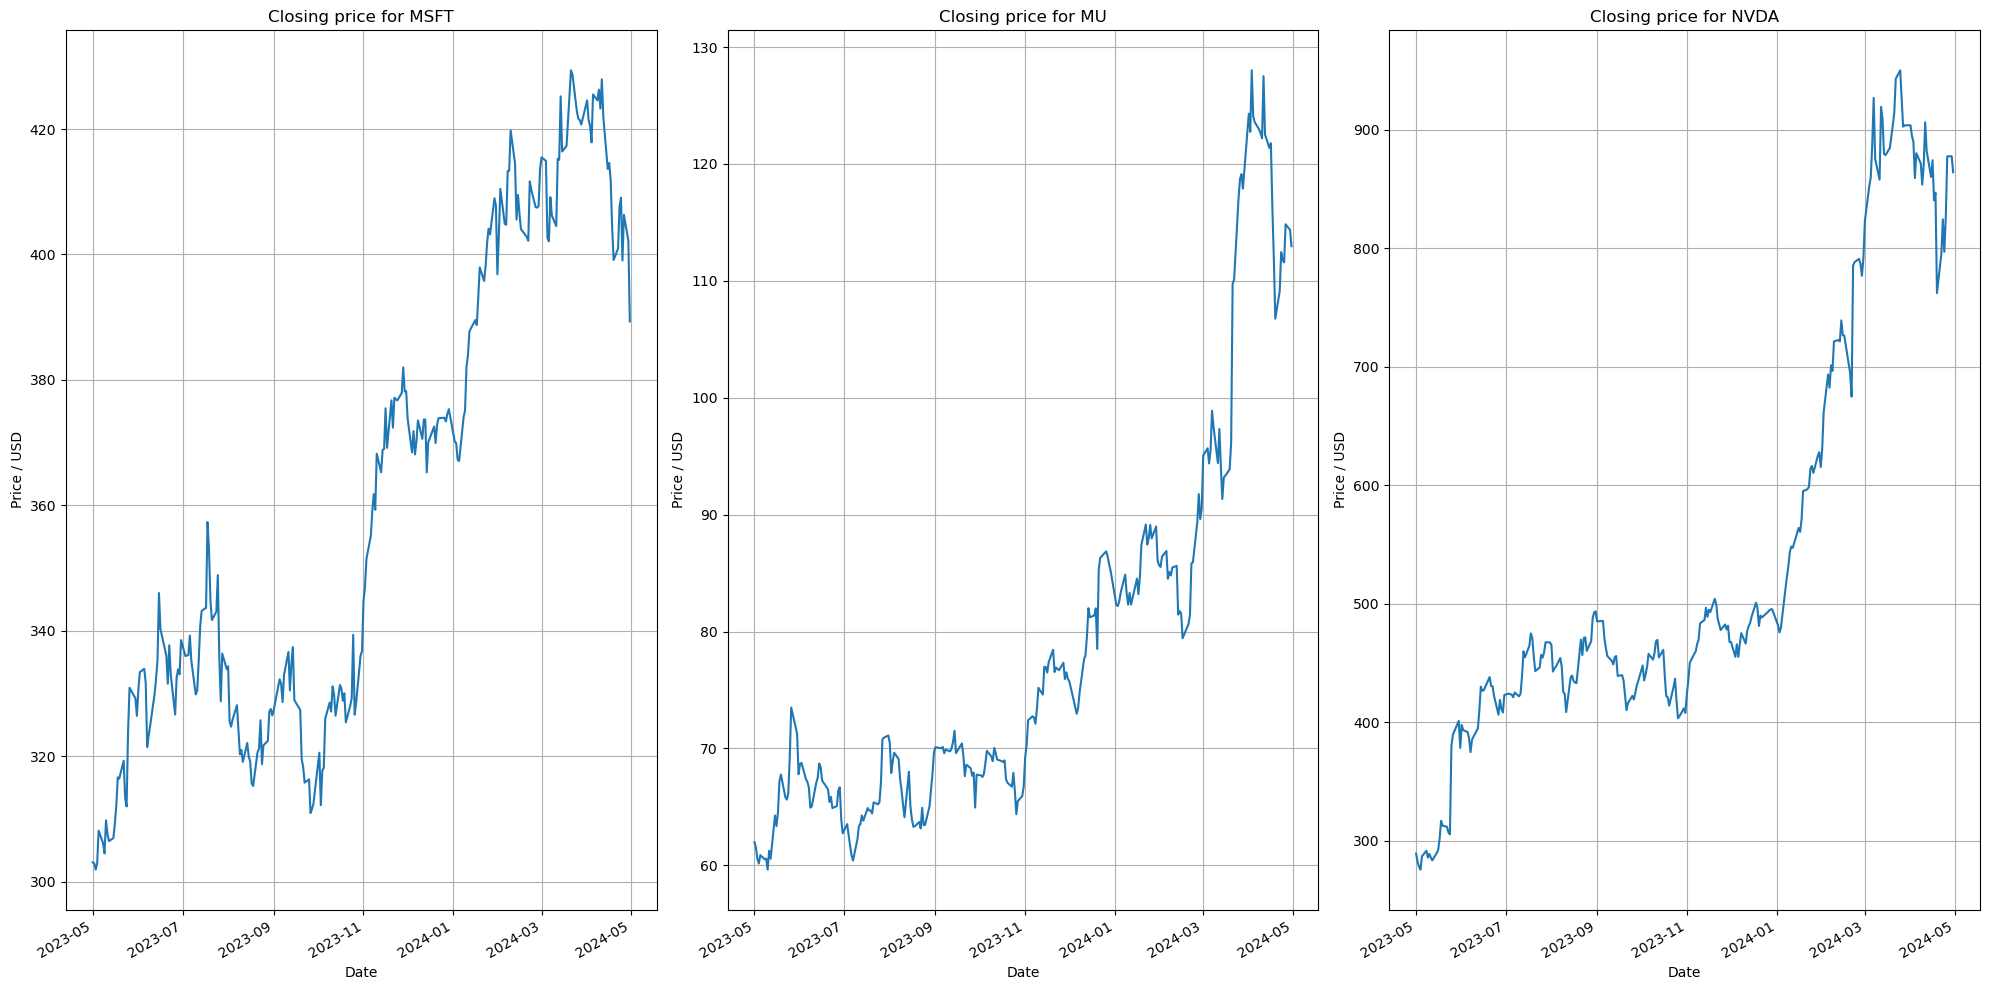

In [4]:
subplotRows = 1
subplotCols = 3
plt.figure(figsize=(20,10))

# visualizing the closig price of the stocks
for i, ticker in enumerate(pd.unique(allData["company_name"]), 1):
    plt.subplot(subplotRows, subplotCols, i)
    allData.loc[allData['company_name'] == ticker]["Adj Close"].plot()
    plt.title("Closing price for {}".format(ticker))
    plt.xlabel("Date")
    plt.ylabel("Price / USD")
    plt.grid()
    plt.tight_layout()

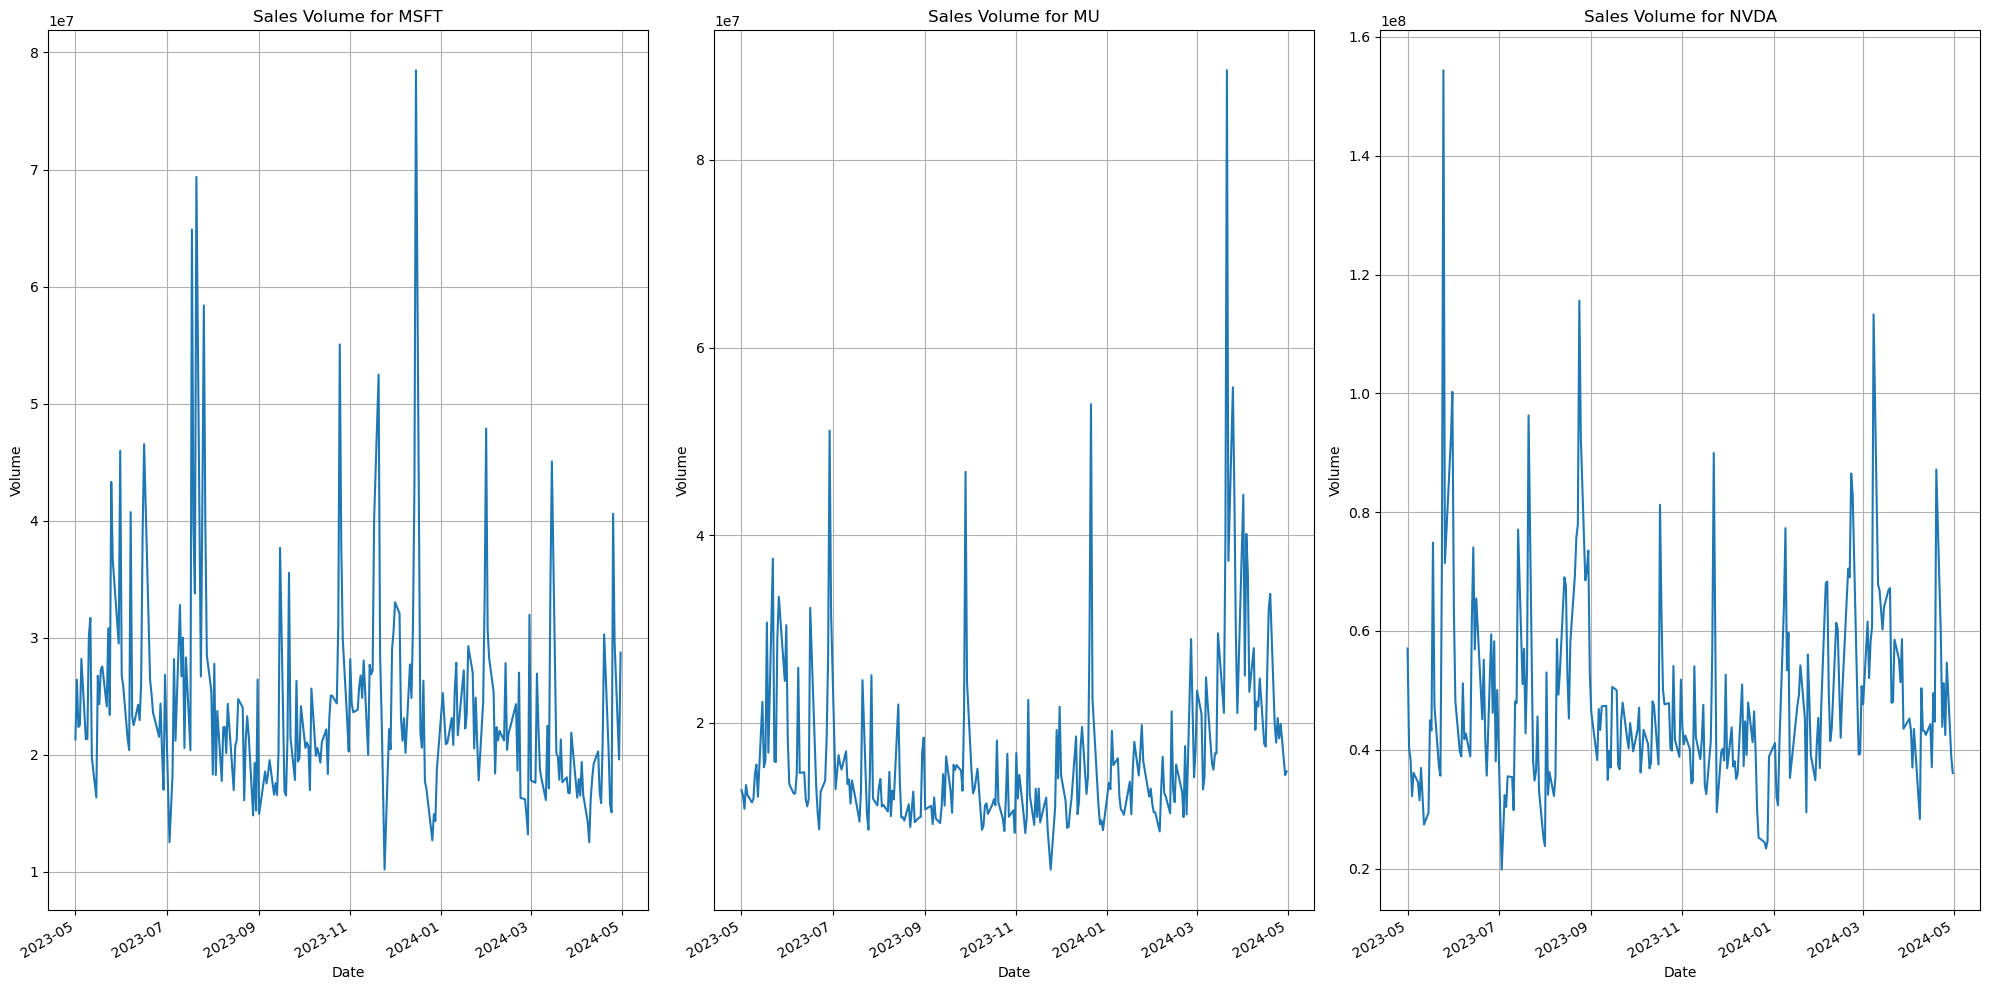

In [5]:
plt.figure(figsize=(20,10))

# visualizing the sales volume of the stocks -  how many changes of the stock ownership
for i, ticker in enumerate(pd.unique(allData["company_name"]), 1):
    plt.subplot(subplotRows, subplotCols, i)
    allData.loc[allData['company_name'] == ticker]["Volume"].plot()
    plt.title("Sales Volume for {}".format(ticker))
    plt.xlabel("Date")
    plt.ylabel("Volume")
    plt.grid()
    plt.tight_layout()

The sales volume in NVDA can be seen with the largest peaks in the same period. This is perhaps because of the recent AI boom. 

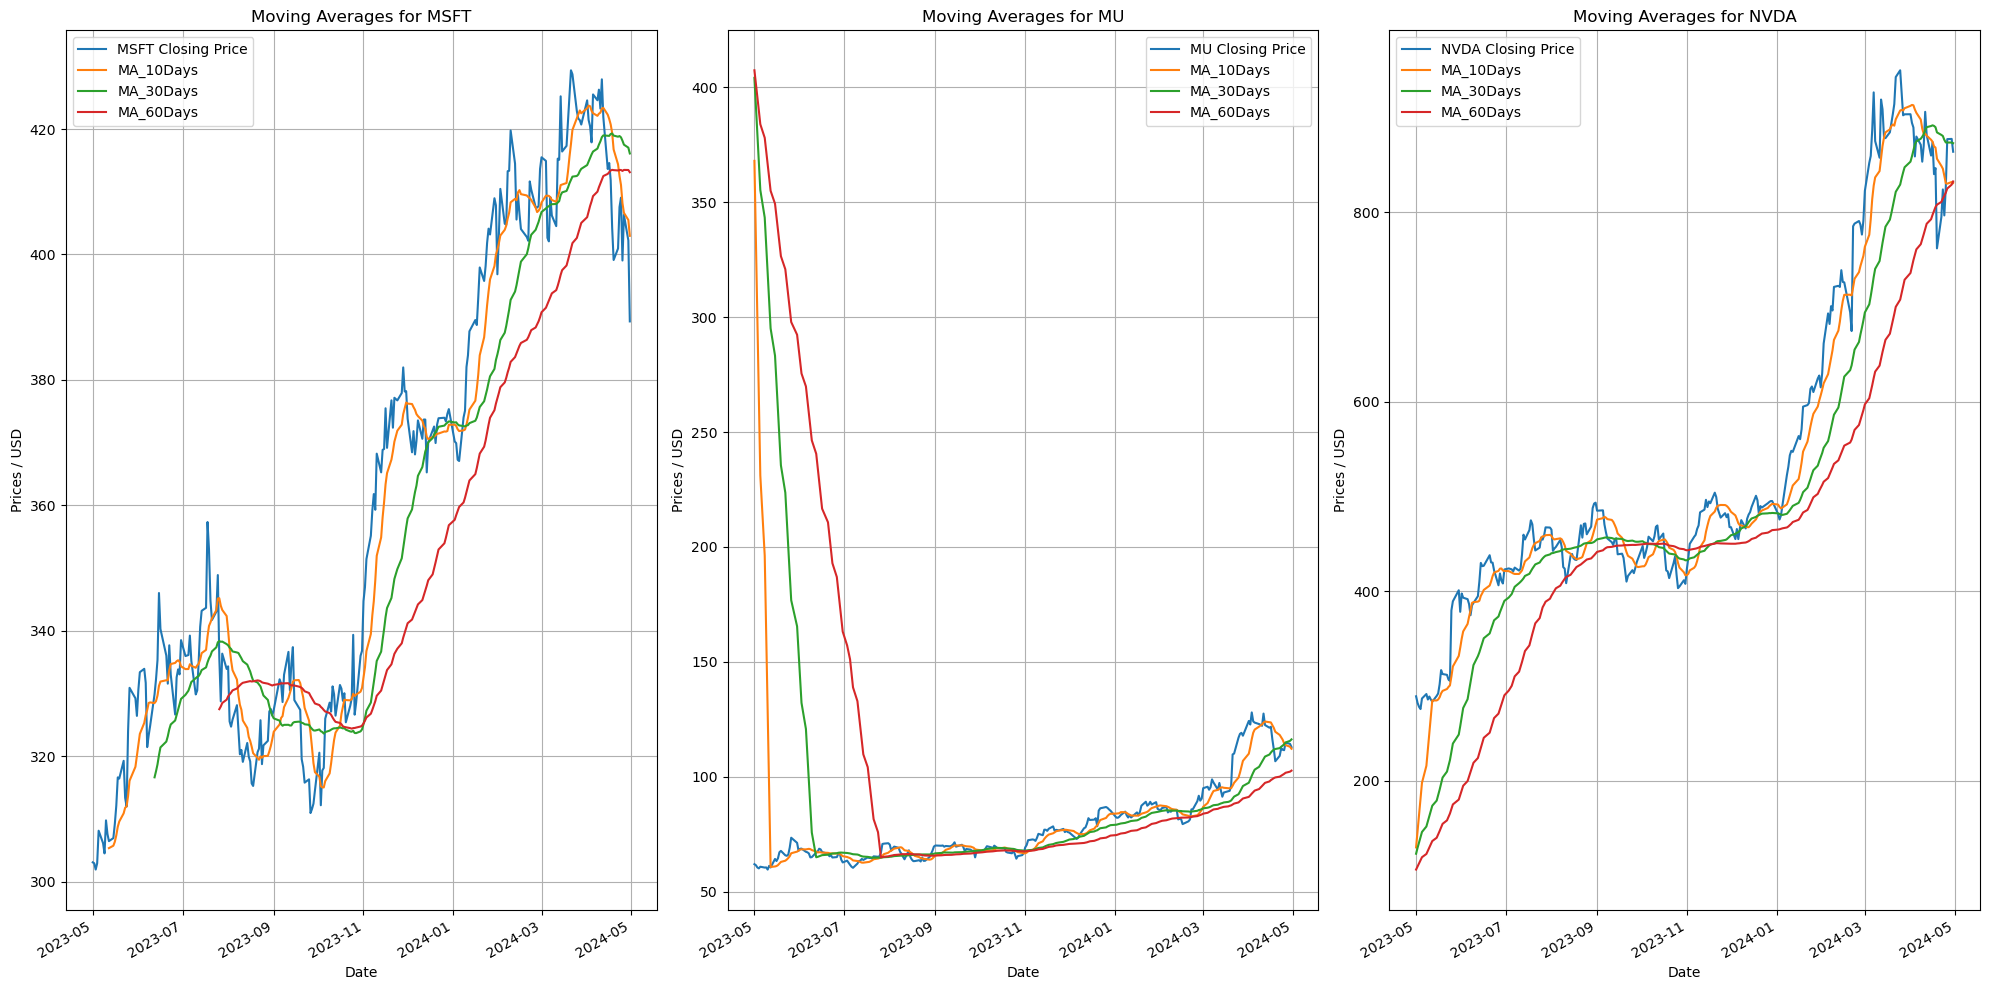

In [6]:
#plotting the moving averages for different timeframes
ma_toPlot = [10,30,60]
plt.figure(figsize=(20,10))
allDataAnalysis = allData.copy(deep=True)


for ma in ma_toPlot:
    # we use the rolling function with the mean to get th erolling averages
    allDataAnalysis["MovingAverage_{}".format(ma)]= allDataAnalysis['Adj Close'].rolling(ma).mean()
    # allDataAnalysis = allDataAnalysis.dropna()

for i, ticker in enumerate(pd.unique(allDataAnalysis["company_name"]), 1):
    plt.subplot(subplotRows, subplotCols, i)
    allDataAnalysis.loc[allDataAnalysis['company_name'] == ticker]["Adj Close"].plot(label="{} Closing Price".format(ticker))

    for ma in ma_toPlot:
        allDataAnalysis.loc[allDataAnalysis['company_name'] == ticker]["MovingAverage_{}".format(ma)].plot(label="MA_{}Days".format(ma))

    plt.title("Moving Averages for {}".format(ticker))
    plt.xlabel("Date")
    plt.ylabel("Prices / USD")
    plt.grid()
    plt.legend()
    plt.tight_layout()



For MU, the sharp decrease indicates a large reduction in the prices. We can test for different moving average values to get which are the best ones to capture the trends of the data without introducing or incorporating too much noise.

One way to improve upon this project to use for example in Robo-Advising, is to make a cutoff for when the moving averages register a sharp decrease. This cutoff serves the purpose of saying this is a little bit too much of f all, so the stock may not yet be stable for investing in the near future. Of course, this is different if the buyer is a day trader instead.

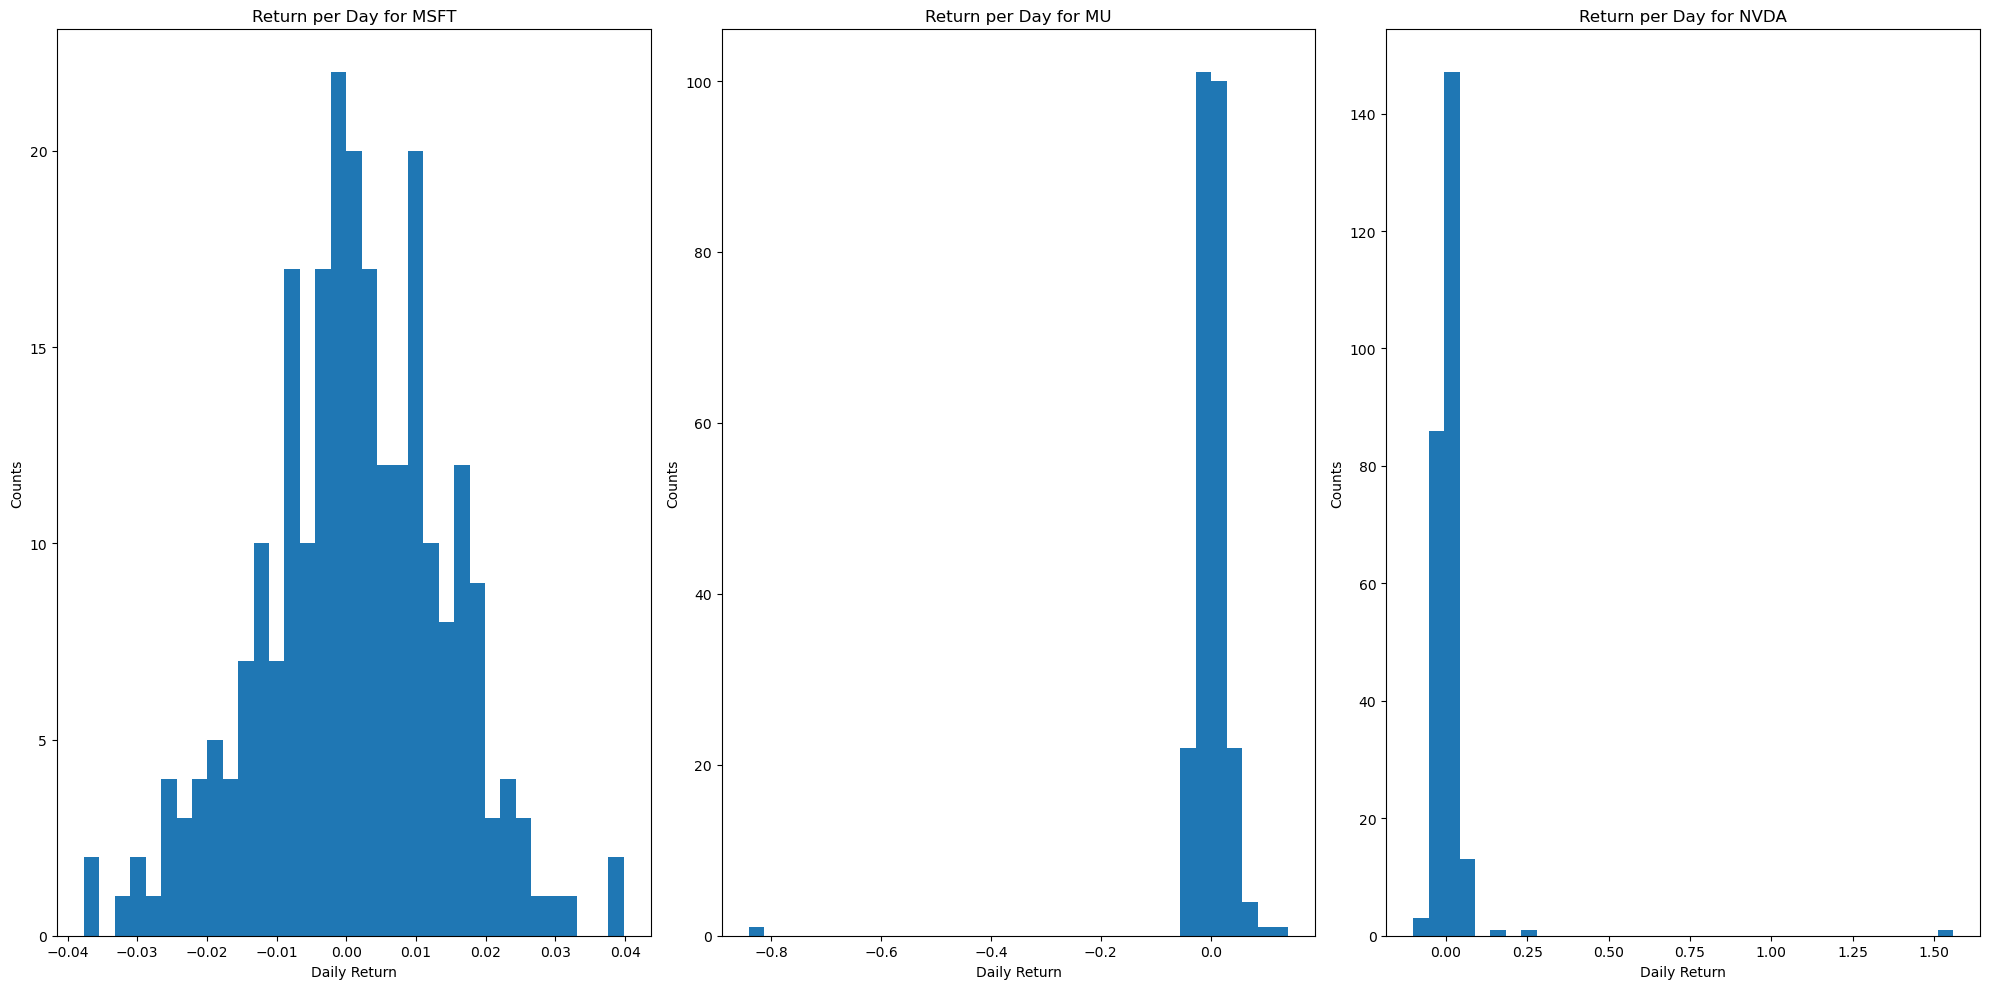

In [7]:
plt.figure(figsize=(20,10))
#recopy for a fresh analysis
allDataAnalysis = allData.copy(deep=True)

# visualizing the precentage change of the stock prices at each end of day
for i, ticker in enumerate(pd.unique(allDataAnalysis["company_name"]), 1):
    plt.subplot(subplotRows, subplotCols, i)

    # we use the percentgae change to mimic the daily profits of a day trader
    allDataAnalysis["Return per Day"] = allDataAnalysis["Adj Close"].pct_change()
    
    allDataAnalysis.loc[allDataAnalysis['company_name'] == ticker]["Return per Day"].hist(bins=35)
    plt.title("Return per Day for {}".format(ticker))
    plt.xlabel("Daily Return")
    plt.ylabel("Counts")
    plt.grid()
    plt.tight_layout()

Again, the large counts for negative daily returns show that MU suffered from a loss in the past year. A distribution that is almost normal, such as the one in MSFT may indicate a relatively stable price.

## Visualizing the correlations between the stocks

The data by default chooses MSFT, a software company, and MU and NVDA, a predominantly semiconductor with a focus on storage solutions and a company that is recently making waves in the field of AI. 

I am interested in modelling the similarities in the trends of the semiconductor industry as AI is still making headlines. Therefore MU against NVDA is a natural choice.

At the same time, I know companies like MSFT would most probably want to incorporate AI in their software, such as in the Windows 11 operating system.

Therefore, if we want to invest in one, should we invest also in others, which are perhaps intertwined?

In [8]:
allDataAnalysis = allData.copy(deep=True)

#we get the closing prices of the stocks
corrPrelim = pd.DataFrame()
for ticker in pd.unique(allDataAnalysis["company_name"]):
    data = allDataAnalysis.loc[allDataAnalysis['company_name'] == ticker]["Adj Close"]
    corrPrelim = pd.concat([corrPrelim,data], axis=1)

#rename the columns according to the ticker
corrPrelim.columns = pd.unique(allDataAnalysis["company_name"])
corr_df = corrPrelim.pct_change()

display(corr_df)

,MSFT,MU,NVDA
2023-05-01 00:00:00,NaN,NaN,NaN
2023-05-02 00:00:00,-0.000491,-0.007217,-0.024213
2023-05-03 00:00:00,-0.003307,-0.015994,-0.014463
2023-05-04 00:00:00,0.003318,-0.006567,-0.008633
2023-05-05 00:00:00,0.017157,0.011899,0.040563
...,...,...,...
2024-04-24 00:00:00,0.003656,-0.006047,-0.033316
2024-04-25 00:00:00,-0.024495,-0.001789,0.037087
2024-04-26 00:00:00,0.018244,0.029217,0.061756
2024-04-29 00:00:00,-0.010017,-0.004180,0.000251


Now we cna view the correlation of the Daily return between each company

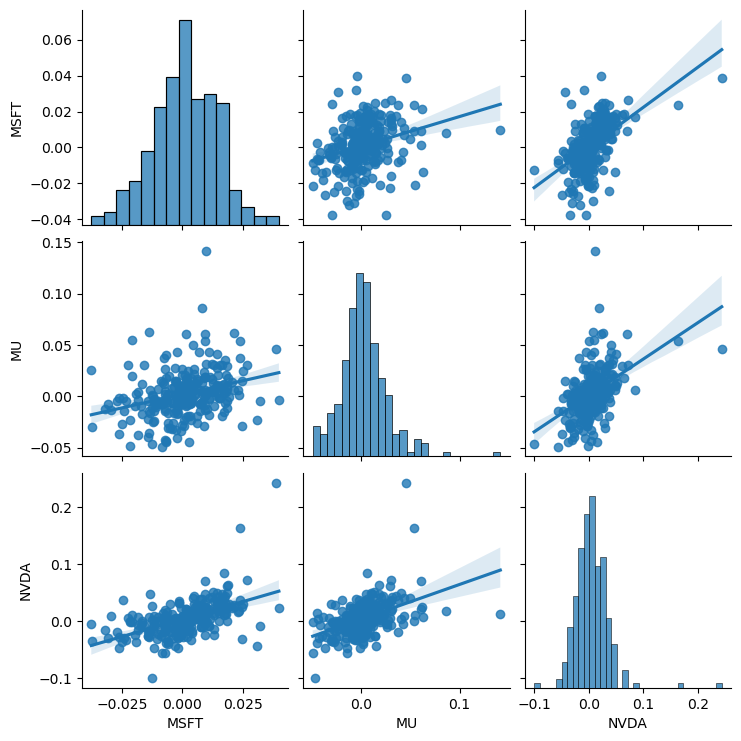

In [9]:
sns.pairplot(corr_df, kind='reg')

Text(0.5, 1.0, 'Correlation of the closing price')

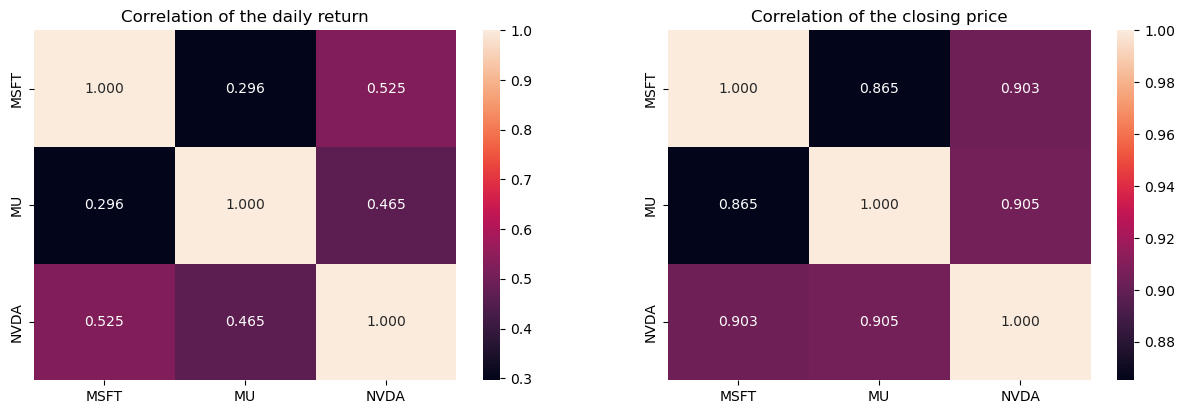

In [10]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.heatmap(corr_df.corr(), annot=True, fmt=".3f")
plt.title('Correlation of the daily return')

plt.subplot(2, 2, 2)
sns.heatmap(corrPrelim.corr(), annot=True, fmt=".3f")
plt.title('Correlation of the closing price')



As expected, NVDA seems to have a strong correlation for the closing price. However, the daily return correlation for MSFT and NVDA is slightly better than MU with NVDA.

Maybe the software industry is benefitting more in the AI boom compared to semiconductor industry, instead of both going hand in hand?

## Price Predictions

TO Predict the stock movements, we use a Neural Network (NN) that can be obtained from packages and APIs. Writing a NN class in Python from scratch is of course doable, but there would be no need to do that as these APIs are better in terms of scalability.

In particular, there are various types of NN's. We use here a type most commonly used for time series predictions, which are predicitons based on data that comes in a range of time, with constant intervals. The NN we use here is called the Long Short Term Memory neteork (LSTM).

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


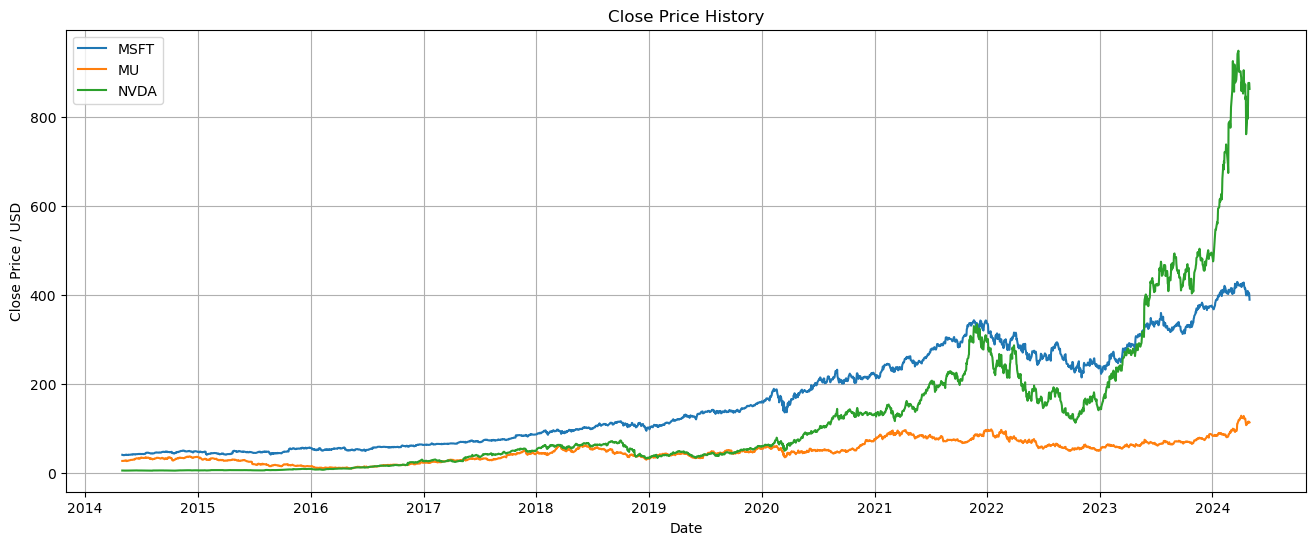

In [11]:
#Take in more data to train the model better. Previously we took only 1 year's worth of data for the plots above
allDataAnalysis = pd.DataFrame()
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day) #10 years worth of data

for ticker in tickerList:
    data = yf.download(ticker, start, end)
    data['company_name'] = ticker
    allDataAnalysis = pd.concat([allDataAnalysis,data], axis=0)

# we create a new dataframe for the closing price, which is the varibale we wish to predict
closePrice_df = pd.DataFrame()

for ticker in pd.unique(allDataAnalysis["company_name"]):
    data = allDataAnalysis.loc[allDataAnalysis['company_name'] == ticker]["Close"]
    closePrice_df = pd.concat([closePrice_df,data], axis =1)

#again, rename the columns with the appropriate tickers
closePrice_df.columns = pd.unique(allDataAnalysis["company_name"])

#plot the closing price history. Previously, we saw the Adj Close price instead
plt.figure(figsize=(16,6))
for i in closePrice_df.columns:
    plt.plot(closePrice_df[i], label = i)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price / USD')
plt.legend()
plt.grid()
plt.show()

2024-05-01 20:40:15.483297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-01 20:40:15.484805: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-01 20:40:15.485980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1954/1954 [==============================] - 174s 87ms/step - loss: 0.0011


2024-05-01 20:43:09.958947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-01 20:43:09.960448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-01 20:43:09.961708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 2s 73ms/step


<Figure size 640x480 with 0 Axes>

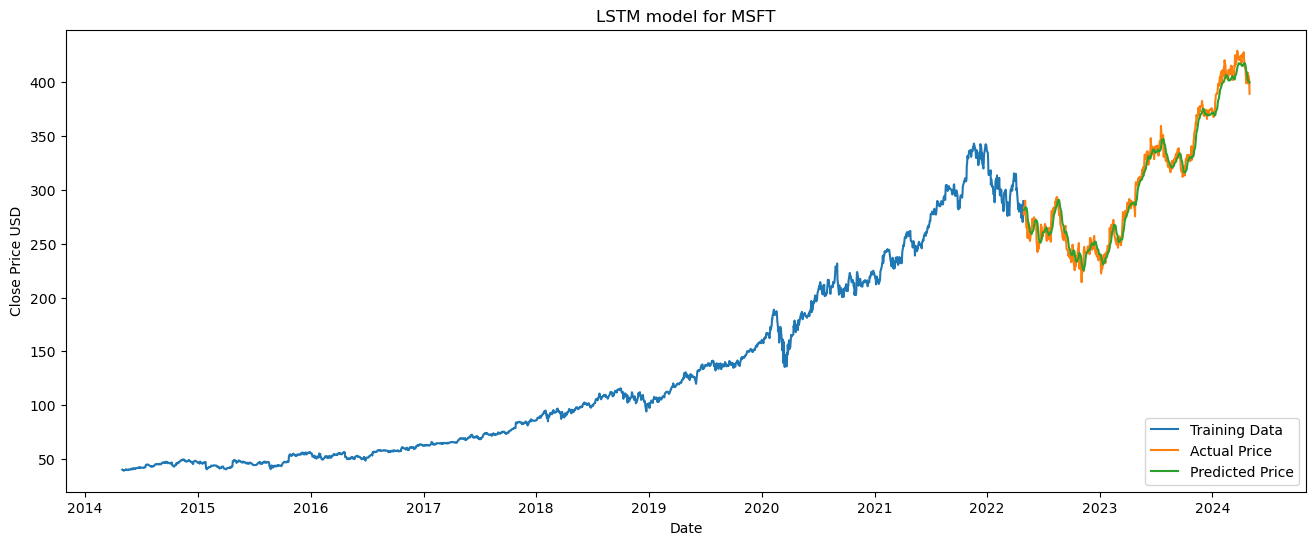

(8.42955021441652,
                           Close  Predictions
 2022-04-29 00:00:00  277.519989   281.449219
 2022-05-02 00:00:00  284.470001   281.645264
 2022-05-03 00:00:00  281.779999   282.248962
 2022-05-04 00:00:00  289.980011   282.678284
 2022-05-05 00:00:00  277.350006   283.829620
 ...                         ...          ...
 2024-04-24 00:00:00  409.059998   402.825470
 2024-04-25 00:00:00  399.040009   402.012360
 2024-04-26 00:00:00  406.320007   400.781494
 2024-04-29 00:00:00  402.250000   400.347870
 2024-04-30 00:00:00  389.329987   399.881287
 
 [503 rows x 2 columns])

2024-05-01 20:43:13.296260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-01 20:43:13.297451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-01 20:43:13.298348: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1954/1954 [==============================] - 162s 81ms/step - loss: 0.0012


2024-05-01 20:45:55.965256: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-01 20:45:55.967001: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-01 20:45:55.968396: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 2s 57ms/step


<Figure size 640x480 with 0 Axes>

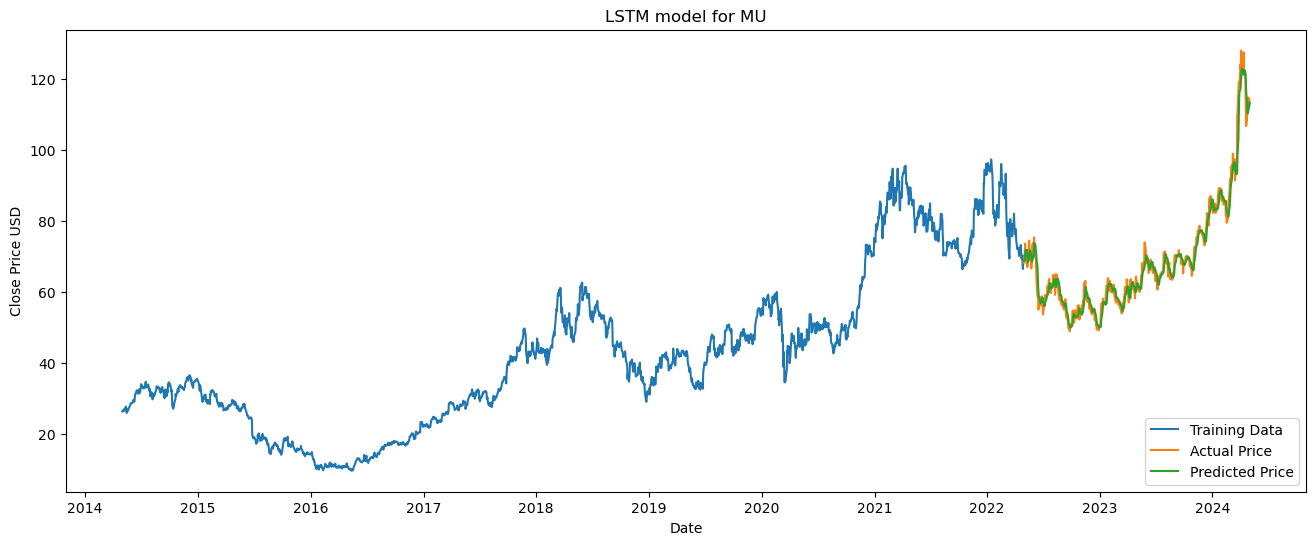

(2.5661876174380516,
                           Close  Predictions
 2022-04-29 00:00:00   68.190002    68.775848
 2022-05-02 00:00:00   70.599998    68.687988
 2022-05-03 00:00:00   71.260002    69.218842
 2022-05-04 00:00:00   73.620003    70.012024
 2022-05-05 00:00:00   71.290001    71.288483
 ...                         ...          ...
 2024-04-24 00:00:00  111.779999   110.327217
 2024-04-25 00:00:00  111.580002   110.630920
 2024-04-26 00:00:00  114.839996   111.113457
 2024-04-29 00:00:00  114.360001   112.416183
 2024-04-30 00:00:00  112.959999   113.505257
 
 [503 rows x 2 columns])

2024-05-01 20:45:58.002216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-01 20:45:58.003540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-01 20:45:58.004548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1954/1954 [==============================] - 166s 83ms/step - loss: 2.0025e-04


2024-05-01 20:48:44.388359: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-01 20:48:44.389969: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-01 20:48:44.391304: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16/16 [==============================] - 2s 90ms/step


<Figure size 640x480 with 0 Axes>

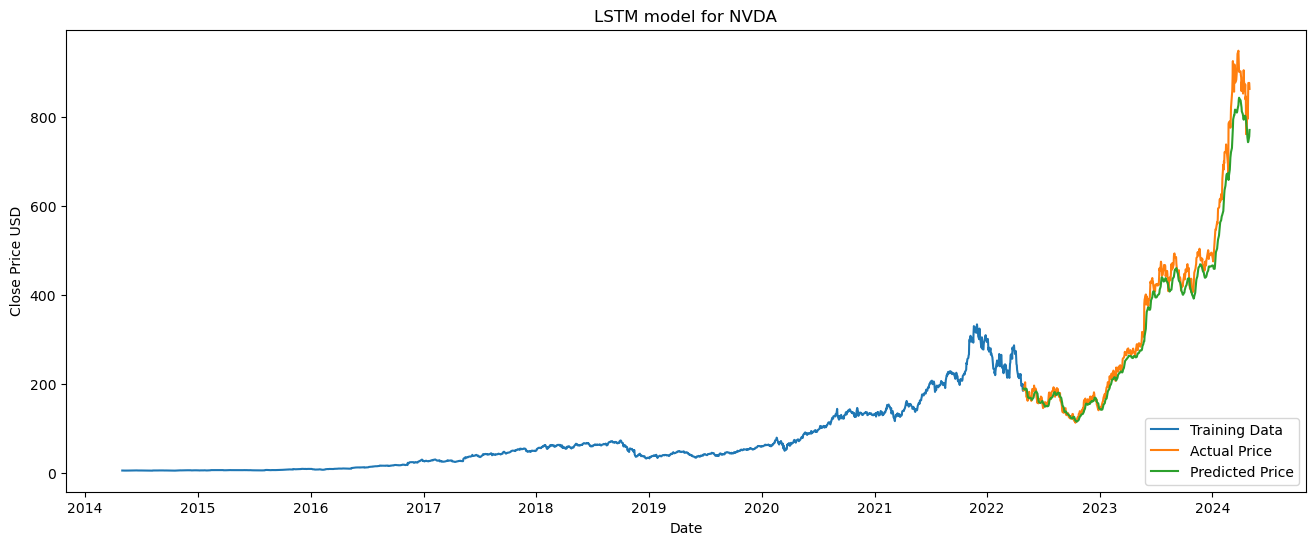

(36.968468962051176,
                           Close  Predictions
 2022-04-29 00:00:00  185.470001   189.266174
 2022-05-02 00:00:00  195.330002   187.034653
 2022-05-03 00:00:00  196.020004   186.598221
 2022-05-04 00:00:00  203.339996   187.166229
 2022-05-05 00:00:00  188.440002   189.250351
 ...                         ...          ...
 2024-04-24 00:00:00  796.770020   749.506104
 2024-04-25 00:00:00  826.320007   744.012695
 2024-04-26 00:00:00  877.349976   745.061951
 2024-04-29 00:00:00  877.570007   757.194885
 2024-04-30 00:00:00  864.020020   771.616455
 
 [503 rows x 2 columns])

In [55]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

'''as we want to predict for several tickers, we can implement a simple function 
for the neural network to handle the training and testing automatically'''
def NN_trainer_tester(dataRaw, ticker, trainPercent=0.8):
    
    '''
    This function takes in the data as a numpy array:
        1. Trains and tests it based on predetermined NN properties
        2. Measures the error
        3. Plots the Prediction vs. the Actual values
        4. Returns the error, and the prediction values
    '''

    #data is assumed to be in numpy array for the model, so we have to reshape it
    data = dataRaw.values.reshape(-1, 1)
    train_len = int(np.ceil( len(data) * trainPercent))

    #rescale and normalize
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(data)

    #get the training data to be in the correct form
    train_data = scaled_data[0:int(train_len), :]
    x_train = []
    y_train = []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    #make numpy arrays out of the train data
    x_train, y_train = np.array(x_train), np.array(y_train)

    #NN training has to in a matrix form, to symbolize the shapes of the outputs and the inputs, so a reshaping is necessary
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    #build the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    '''
    Now we can compile(finalize) and train the model. Again, the loss function is also something that is a bit advanced, 
    typically because of the amount of linear algebra involved. Understanding them may be beneficial if anyone is interested
    '''
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs=1) #epochs are the number of times to rerun to improve the model


    #below is for testing
    test_data = scaled_data[train_len - 60: , :]
    x_test = []
    y_test = data[train_len:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
        
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

    #We can get the predicted values like so 
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    #One of the methods to estimate the error is via something called the Root Mean Squared Error
    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

    train = pd.DataFrame()
    valid = pd.DataFrame()
    train["Close"] = dataRaw[:train_len]
    valid["Close"] = pd.Series(dataRaw[train_len:])
    valid["Predictions"] = predictions

    plt.clf()
    plt.figure(figsize=(16,6))
    plt.title('LSTM model for {}'.format(ticker))
    plt.xlabel('Date')
    plt.ylabel('Close Price USD')
    plt.plot(train['Close'], label="Training Data")
    plt.plot(valid[['Close', 'Predictions']], label=["Actual Price", "Predicted Price"])
    plt.legend(loc='lower right')
    plt.show()

    return rmse, valid

#testing the NN
for company in closePrice_df.columns:
    data1 = closePrice_df[company]
    display(NN_trainer_tester(data1, ticker = company))


## Options Prices

Another derivative of the stocks in financial markets are called options, which are similar to insurance in some ways. 

There are two types of options, call options and put options, used to buy stocks at a lower price and sell them at a higher price respectively.

The package yfinance provides market values for those financial derivatives as well. In particular, we can take a look at the prices of these options for MSFT.

One can also construct NN's to preedict the prices of these derivatives instead, if options trading is more to his taste.

In [110]:
#Scraping and plotting of options data
msft_opt = yf.Ticker("MSFT")
opt_dates = msft_opt.options

The data comes in the week of the option expiry, so we need to wrangle it a bit to get a good visualization

In [86]:
#the data also comes in call and put options separately, which we can access like so
msft_calls = pd.DataFrame()
msft_puts = pd.DataFrame()

for expirations in opt_dates:
    msft_calls = pd.concat([msft_calls,msft_opt.option_chain(opt_dates[0]).calls], axis=0)
    msft_puts = pd.concat([msft_puts,msft_opt.option_chain(opt_dates[0]).puts], axis=0)

display(msft_calls.head())
display(msft_puts.head())


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT240503C00245000,2024-04-19 15:00:57+00:00,245.0,157.80,146.05,148.50,0.0,0.0,1.0,1,2.743167,True,REGULAR,USD
1,MSFT240503C00250000,2024-04-30 16:35:22+00:00,250.0,146.00,141.10,143.65,0.0,0.0,3.0,31,2.715824,True,REGULAR,USD
2,MSFT240503C00260000,2024-04-30 16:20:32+00:00,260.0,137.45,131.25,133.65,0.0,0.0,1.0,1,2.510746,True,REGULAR,USD
3,MSFT240503C00275000,2024-04-19 16:57:51+00:00,275.0,125.22,116.05,118.50,0.0,0.0,2.0,2,2.151860,True,REGULAR,USD
4,MSFT240503C00280000,2024-04-25 13:51:43+00:00,280.0,111.46,111.35,113.60,0.0,0.0,2.0,0,2.100591,True,REGULAR,USD


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT240503P00220000,2024-04-26 16:51:33+00:00,220.0,0.01,0.0,0.01,0.0,0.0,3.0,7,1.875001,False,REGULAR,USD
1,MSFT240503P00230000,2024-04-19 19:19:52+00:00,230.0,0.05,0.0,0.01,0.0,0.0,40.0,44,1.750001,False,REGULAR,USD
2,MSFT240503P00250000,2024-04-17 16:32:43+00:00,250.0,0.05,0.0,0.02,0.0,0.0,NaN,3,1.578127,False,REGULAR,USD
3,MSFT240503P00260000,2024-04-30 15:38:50+00:00,260.0,0.01,0.0,0.02,0.0,0.0,2.0,27,1.453128,False,REGULAR,USD
4,MSFT240503P00265000,2024-04-25 14:19:31+00:00,265.0,0.03,0.0,0.02,0.0,0.0,NaN,3,1.390628,False,REGULAR,USD


2024-04-19
2024-04-30
2024-04-25
2024-04-23
2024-04-29
2024-04-22
2024-04-26
2024-04-24
2024-05-01


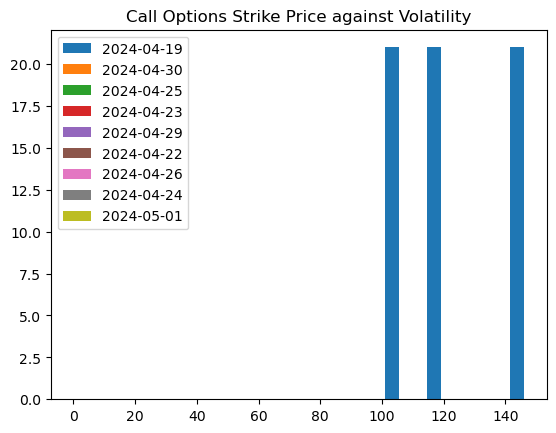

2024-04-19
2024-04-30
2024-04-25
2024-04-23
2024-04-29
2024-04-22
2024-04-26
2024-04-24
2024-05-01


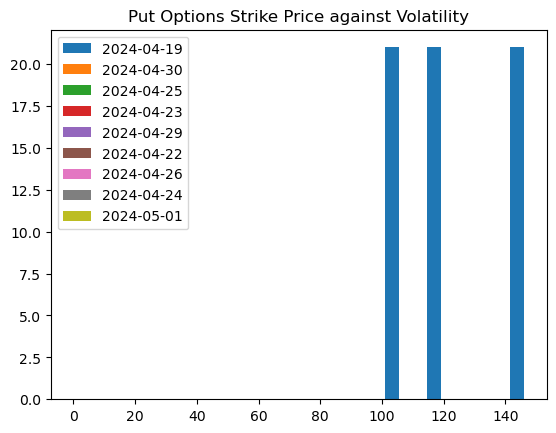

In [105]:
def optPlots(opts, title):
    
    # we can iterate over each week,a dn then plot them separately
    # for example, we can visualize the volatility of the options

    for expWeek in pd.unique(opts["lastTradeDate"].dt.date):
        print(expWeek)
        opts = opts.loc[opts["lastTradeDate"].dt.date == expWeek]
        plt.hist(opts["bid"], label=expWeek)
    
    plt.title(title)
    plt.legend()
    plt.show()
        

optPlots(msft_calls, "Call Options Strike Price against Volatility")
optPlots(msft_calls, "Put Options Strike Price against Volatility")

## Quantifying Risks of Investment

All investments come with a risk. There are several ways to quantify them, and different people may hold more importance for some features of an investment than others. This is one such ways to quantify them.

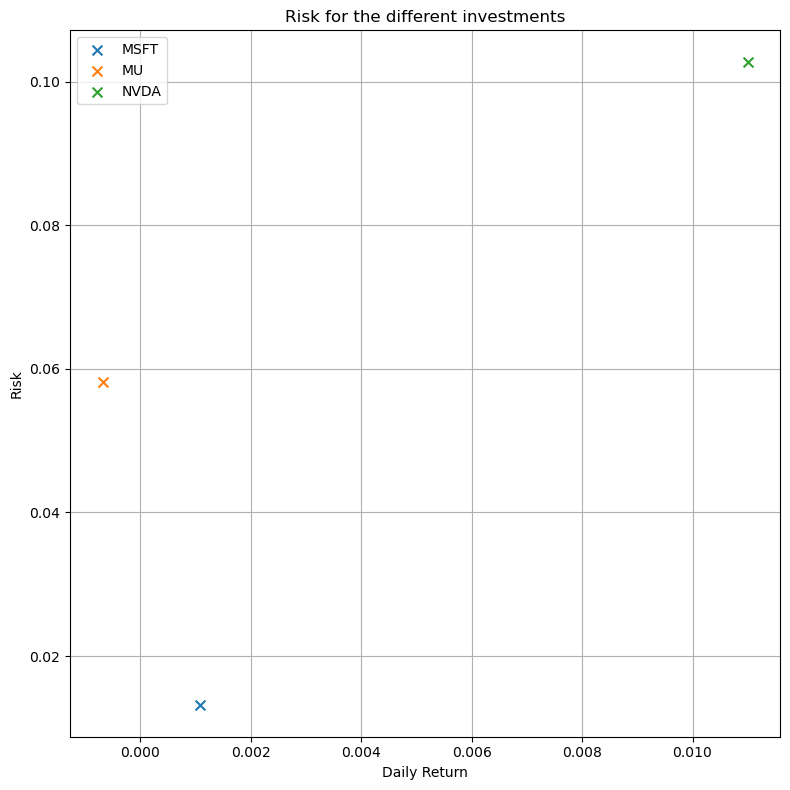

In [121]:
plt.figure(figsize=(8,8))

#recopy from above for a fresh risk analysis
allDataAnalysis = allData.copy(deep=True)
allDataAnalysis["Return per Day"] = allDataAnalysis["Adj Close"].pct_change()

# visualizing the precentage change of the stock prices at each end of day
for ticker in pd.unique(allDataAnalysis["company_name"]):   
    plt.scatter(allDataAnalysis.loc[allDataAnalysis['company_name'] == ticker]["Return per Day"].mean(),allDataAnalysis.loc[allDataAnalysis['company_name'] == ticker]["Return per Day"].std(), label=ticker, s=50, marker='x')
    plt.title("Risk for the different investments")
    plt.xlabel("Daily Return")
    plt.ylabel("Risk")
    plt.grid()
    plt.tight_layout()

plt.legend()
plt.show()